# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [42]:
%matplotlib inline

import pandas as pd
import altair as alt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [2]:
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

In [3]:
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

### Data structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In [5]:
cat_vars = [
    "gender", 
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exhappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr4_s",
    "sinc4_s",
    "intel4_s",
    "fun4_s",
    "amb4_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]

In [6]:
df[cat_vars]=df[cat_vars].astype("category",copy=False)
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In [7]:
df['calls'] = df['you_call'] + df['them_cal']

In [8]:
df['calls'].value_counts()

0.0     1284
1.0      935
2.0      848
4.0      275
3.0      254
5.0      196
6.0      115
9.0       21
14.0      18
10.0      18
22.0      10
Name: calls, dtype: int64

In [9]:
variables = ['match', 'fun', 'shar', 'attr', 'prob', 'intel', 'sinc', 'amb', 'gender', 'samerace', 'race', 'race_o', 'calls', 'age', 'age_o', 'imprace', 'order', 'int_corr']
df = df[variables]

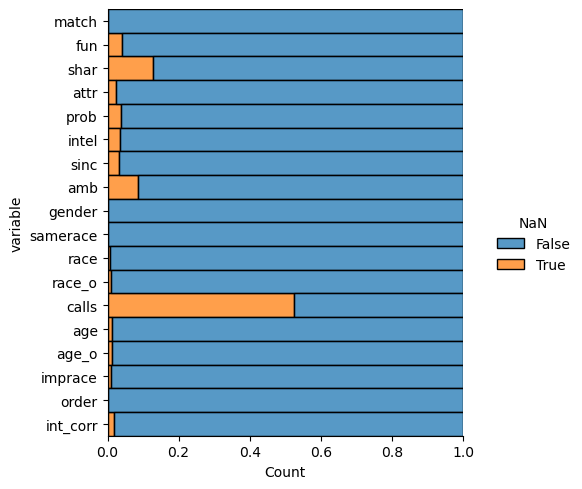

In [10]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

Drop NAs

In [11]:
df

match  fun  shar  attr  prob  intel  sinc  amb gender samerace race  \
0        0  7.0   5.0   6.0   6.0    7.0   9.0  6.0      0        0  4.0   
1        0  8.0   6.0   7.0   5.0    7.0   8.0  5.0      0        0  4.0   
2        1  8.0   7.0   5.0   NaN    9.0   8.0  5.0      0        1  4.0   
3        1  7.0   8.0   7.0   6.0    8.0   6.0  6.0      0        0  4.0   
4        1  7.0   6.0   5.0   6.0    7.0   6.0  6.0      0        0  4.0   
...    ...  ...   ...   ...   ...    ...   ...  ...    ...      ...  ...   
8373     0  5.0   NaN   3.0   5.0    5.0   5.0  NaN      1        0  2.0   
8374     0  4.0   NaN   4.0   4.0    8.0   6.0  4.0      1        0  2.0   
8375     0  8.0   NaN   4.0   5.0    8.0   7.0  8.0      1        0  2.0   
8376     0  4.0   5.0   4.0   5.0    5.0   6.0  NaN      1        0  2.0   
8377     0  4.0   1.0   3.0   5.0    6.0   7.0  8.0      1        0  2.0   

     race_o  calls   age age_o  imprace  order  int_corr  
0       2.0    2.0  21.0  27.0      2.0      4      0.14  
1       2.0    2.0  21.0  22.0      2.0      3      0.54  
2       4.0    2.0  21.0  22.0      2.0     10      0.16  
3       2.0    2.0  21.0  23.0      2.0      5      0.61  
4       3.0    2.0  21.0  24.0      2.0      7      0.21  
...     ...    ...   ...   ...      ...    ...       ...  
8373    3.0    2.0  25.0  26.0      1.0      5      0.64  
8374    6.0    2.0  25.0  24.0      1.0      4      0.71  
8375    3.0    2.0  25.0  29.0      1.0     10     -0.46  
8376    4.0    2.0  25.0  22.0      1.0     16      0.62  
8377    4.0    2.0  25.0  22.0      1.0     15      0.01  

[8378 rows x 18 columns]

In [12]:
df.isna().sum()

match          0
fun          350
shar        1067
attr         202
prob         309
intel        296
sinc         277
amb          712
gender         0
samerace       0
race          63
race_o        73
calls       4404
age           95
age_o        104
imprace       79
order          0
int_corr     158
dtype: int64

In [13]:
df['calls'].fillna(value=0, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

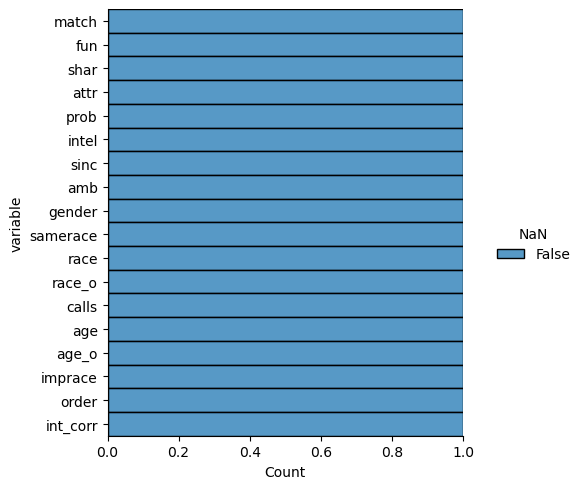

In [14]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

### Variable lists

In [15]:
y_label = 'match'
features = ['fun', 'shar', 'attr', 'prob', 'intel', 'sinc', 'amb', 'gender', 'samerace', 'race', 'race_o', 'calls', 'age', 'age_o', 'imprace', 'order', 'int_corr']

X = df[features]
y = df[y_label]

### Data splitting

In [16]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics

In [17]:
df.describe().T

count       mean       std    min    25%    50%    75%    max
fun       6784.0   6.394089  1.954448   0.00   5.00   7.00   8.00  10.00
shar      6784.0   5.455115  2.142983   0.00   4.00   6.00   7.00  10.00
attr      6784.0   6.182547  1.949812   0.00   5.00   6.00   8.00  10.00
prob      6784.0   5.247052  2.139708   0.00   4.00   5.00   7.00  10.00
intel     6784.0   7.357680  1.556179   0.00   6.00   7.00   8.00  10.00
sinc      6784.0   7.159272  1.748176   0.00   6.00   7.00   8.00  10.00
amb       6784.0   6.757370  1.796135   0.00   6.00   7.00   8.00  10.00
calls     6784.0   0.818101  1.774038   0.00   0.00   0.00   1.00  22.00
age       6784.0  26.240566  3.467577  18.00  24.00  26.00  28.00  55.00
imprace   6784.0   3.860259  2.863640   0.00   1.00   3.00   6.00  10.00
order     6784.0   8.848467  5.446755   1.00   4.00   8.00  13.00  22.00
int_corr  6784.0   0.195414  0.305215  -0.83  -0.02   0.21   0.43   0.91

### Exploratory data analysis

In [18]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
)

c:\Users\lukas\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [27]:
newdf = df[(df.match == 1)]
newdf

match  fun  shar  attr  prob  intel  sinc  amb gender samerace race  \
2        1  7.0   8.0   7.0   6.0    8.0   6.0  6.0      0        0  4.0   
3        1  7.0   6.0   5.0   6.0    7.0   6.0  6.0      0        0  4.0   
7        1  9.0   8.0   7.0   7.0    8.0   6.0  8.0      0        0  4.0   
12       1  6.0   7.0   7.0   8.0    7.0   9.0  5.0      0        1  2.0   
17       1  9.0   5.0   7.0   6.0    8.0   6.0  4.0      0        1  2.0   
...    ...  ...   ...   ...   ...    ...   ...  ...    ...      ...  ...   
6758     1  7.0   5.0   5.0   9.0    7.0   6.0  7.0      1        0  1.0   
6762     1  6.0   5.0   8.0   5.0    8.0   7.0  6.0      1        0  1.0   
6772     1  8.0   7.0   7.0   5.0    9.0   7.0  9.0      1        0  2.0   
6774     1  9.0   8.0   8.0   6.0    9.0   9.0  6.0      1        1  2.0   
6776     1  9.0   8.0   8.0   6.0    8.0   7.0  8.0      1        0  2.0   

     race_o  calls   age age_o  imprace  order  int_corr  
2       2.0    2.0  21.0  23.0      2.0      5      0.61  
3       3.0    2.0  21.0  24.0      2.0      7      0.21  
7       2.0    2.0  21.0  28.0      2.0      8      0.28  
12      2.0    0.0  24.0  23.0      2.0      1     -0.21  
17      2.0    0.0  24.0  28.0      2.0      4      0.11  
...     ...    ...   ...   ...      ...    ...       ...  
6758    4.0    0.0  27.0  27.0      2.0     20      0.53  
6762    2.0    0.0  27.0  26.0      2.0     10     -0.02  
6772    4.0    2.0  25.0  28.0      1.0     12      0.68  
6774    2.0    2.0  25.0  23.0      1.0     13      0.55  
6776    4.0    2.0  25.0  27.0      1.0      9      0.59  

[1167 rows x 18 columns]

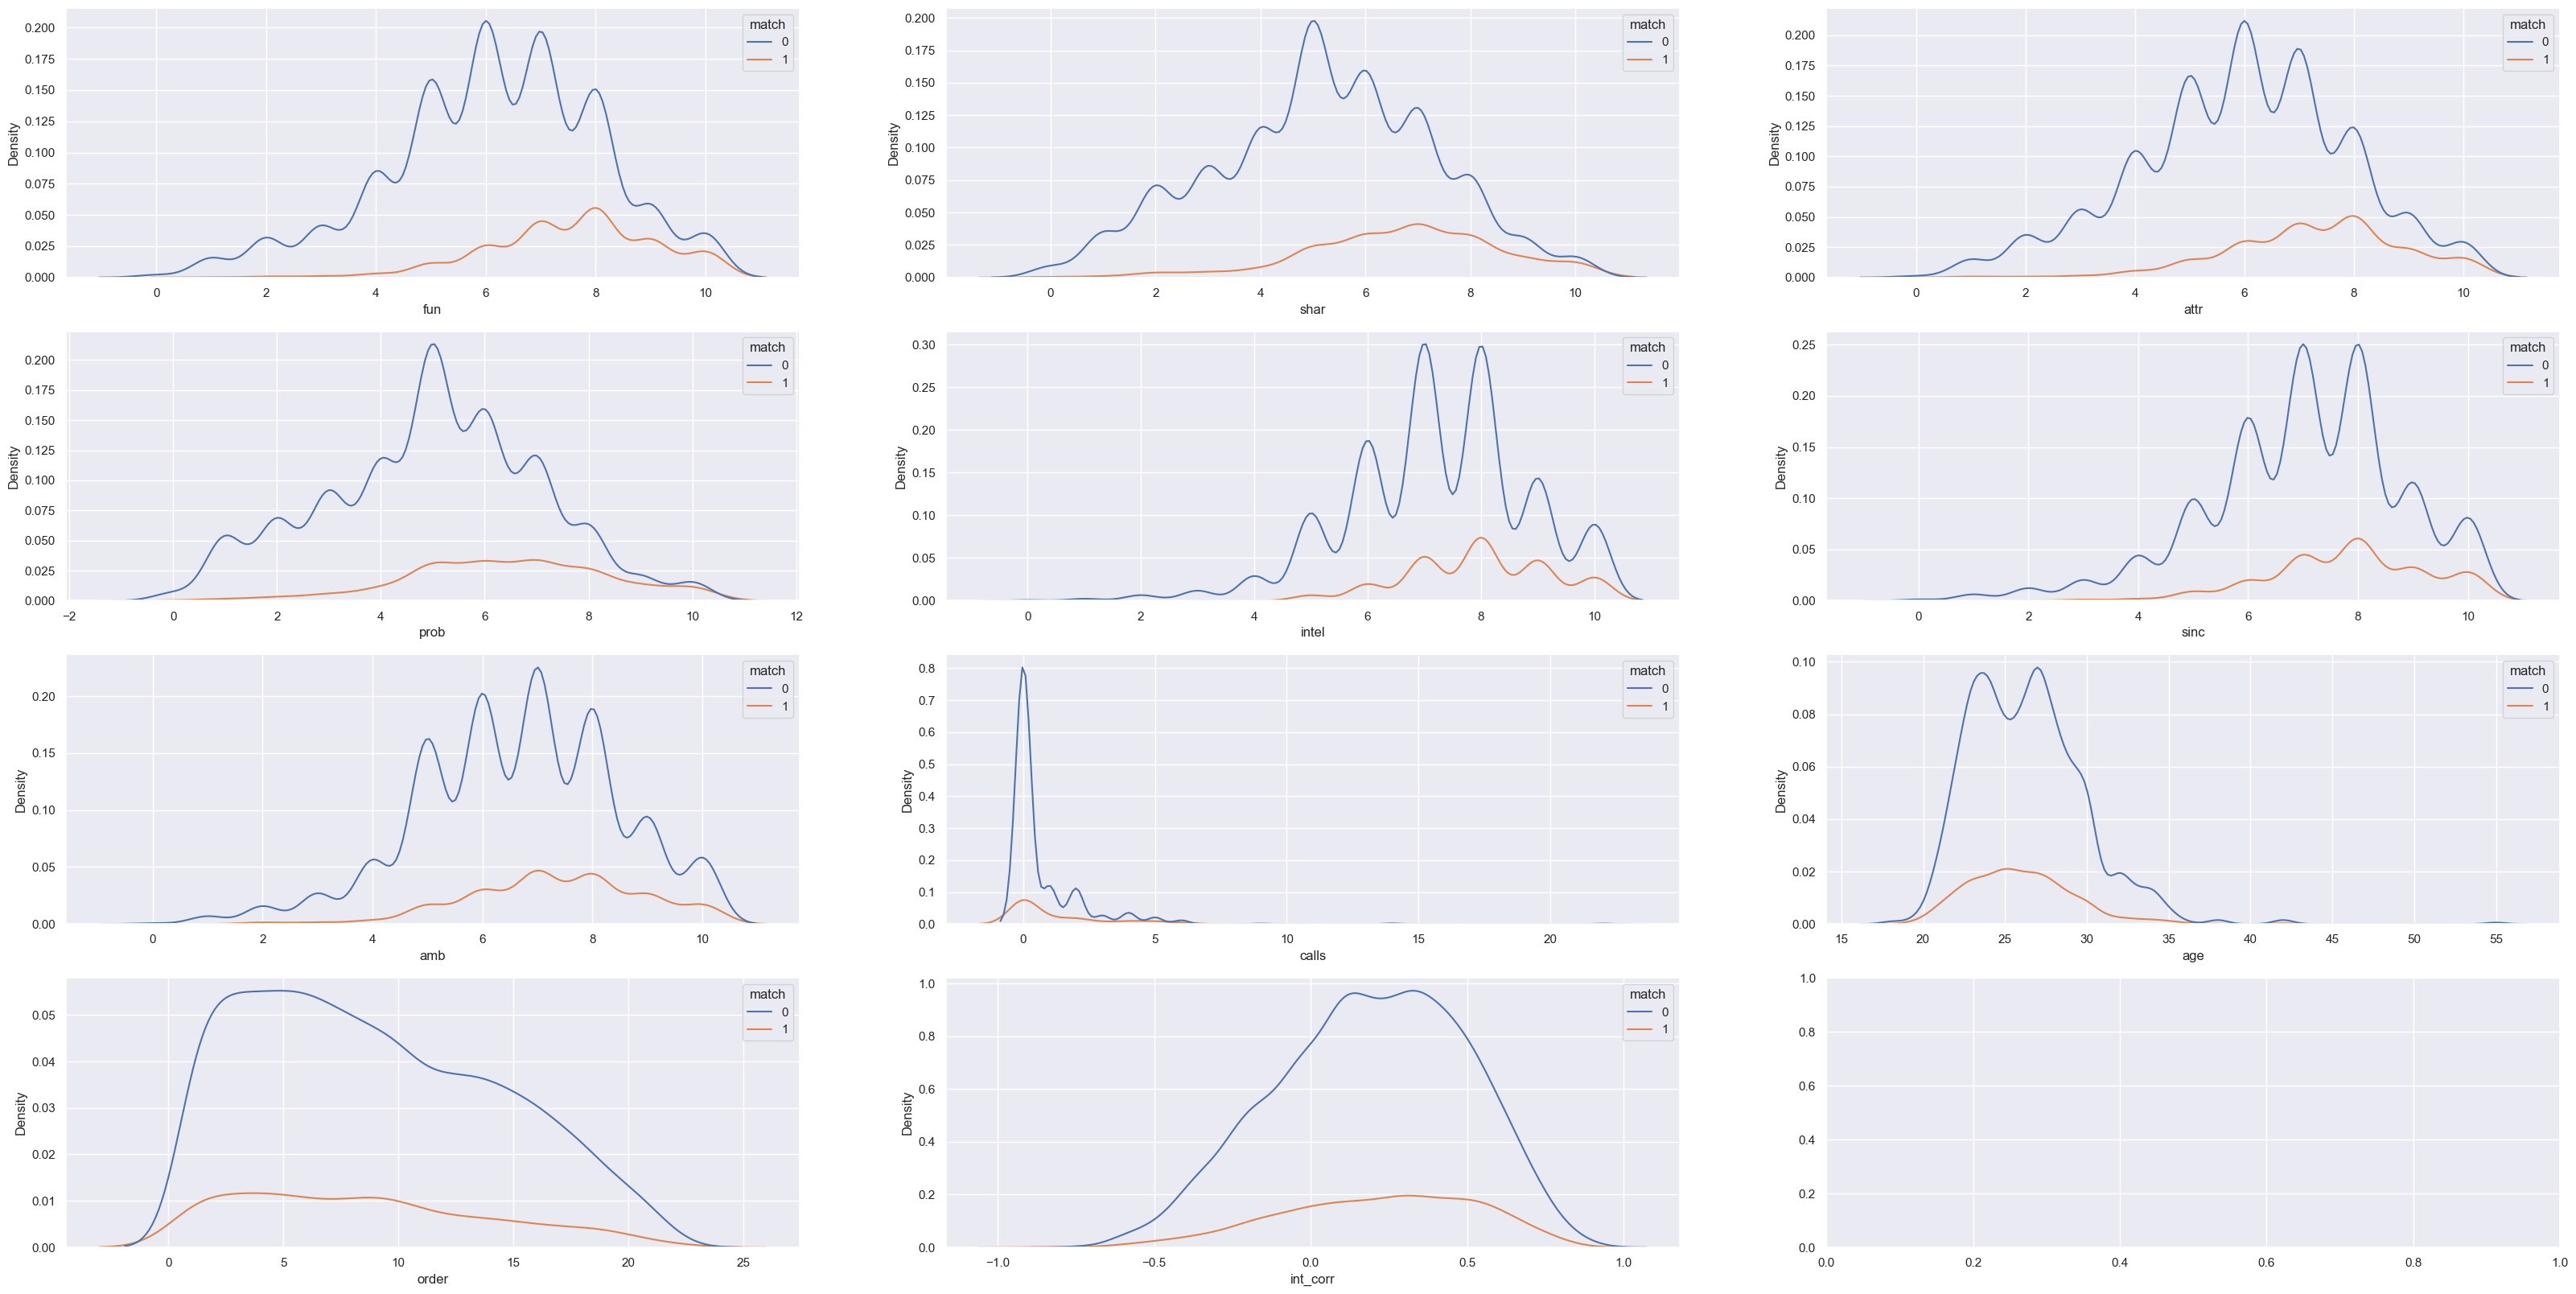

In [57]:
df['match']=df['match'].astype("int",copy=False)

fig, ax = plt.subplots(4,3)
sns.kdeplot(df, x = 'fun', hue='match', ax=ax[0,0])
sns.kdeplot(df, x = 'shar', hue='match', ax=ax[0,1])
sns.kdeplot(df, x = 'attr', hue='match', ax=ax[0,2])
sns.kdeplot(df, x = 'prob', hue='match', ax=ax[1,0])
sns.kdeplot(df, x = 'intel', hue='match', ax=ax[1,1])
sns.kdeplot(df, x = 'sinc', hue='match', ax=ax[1,2])
sns.kdeplot(df, x = 'amb', hue='match', ax=ax[2,0])
sns.kdeplot(df, x = 'calls', hue='match', ax=ax[2,1])
sns.kdeplot(df, x = 'age', hue='match', ax=ax[2,2])
sns.kdeplot(df, x = 'order', hue='match', ax=ax[3,0])
sns.kdeplot(df, x = 'int_corr', hue='match', ax=ax[3,1])

sns.set(rc={'figure.figsize':(40,40)})

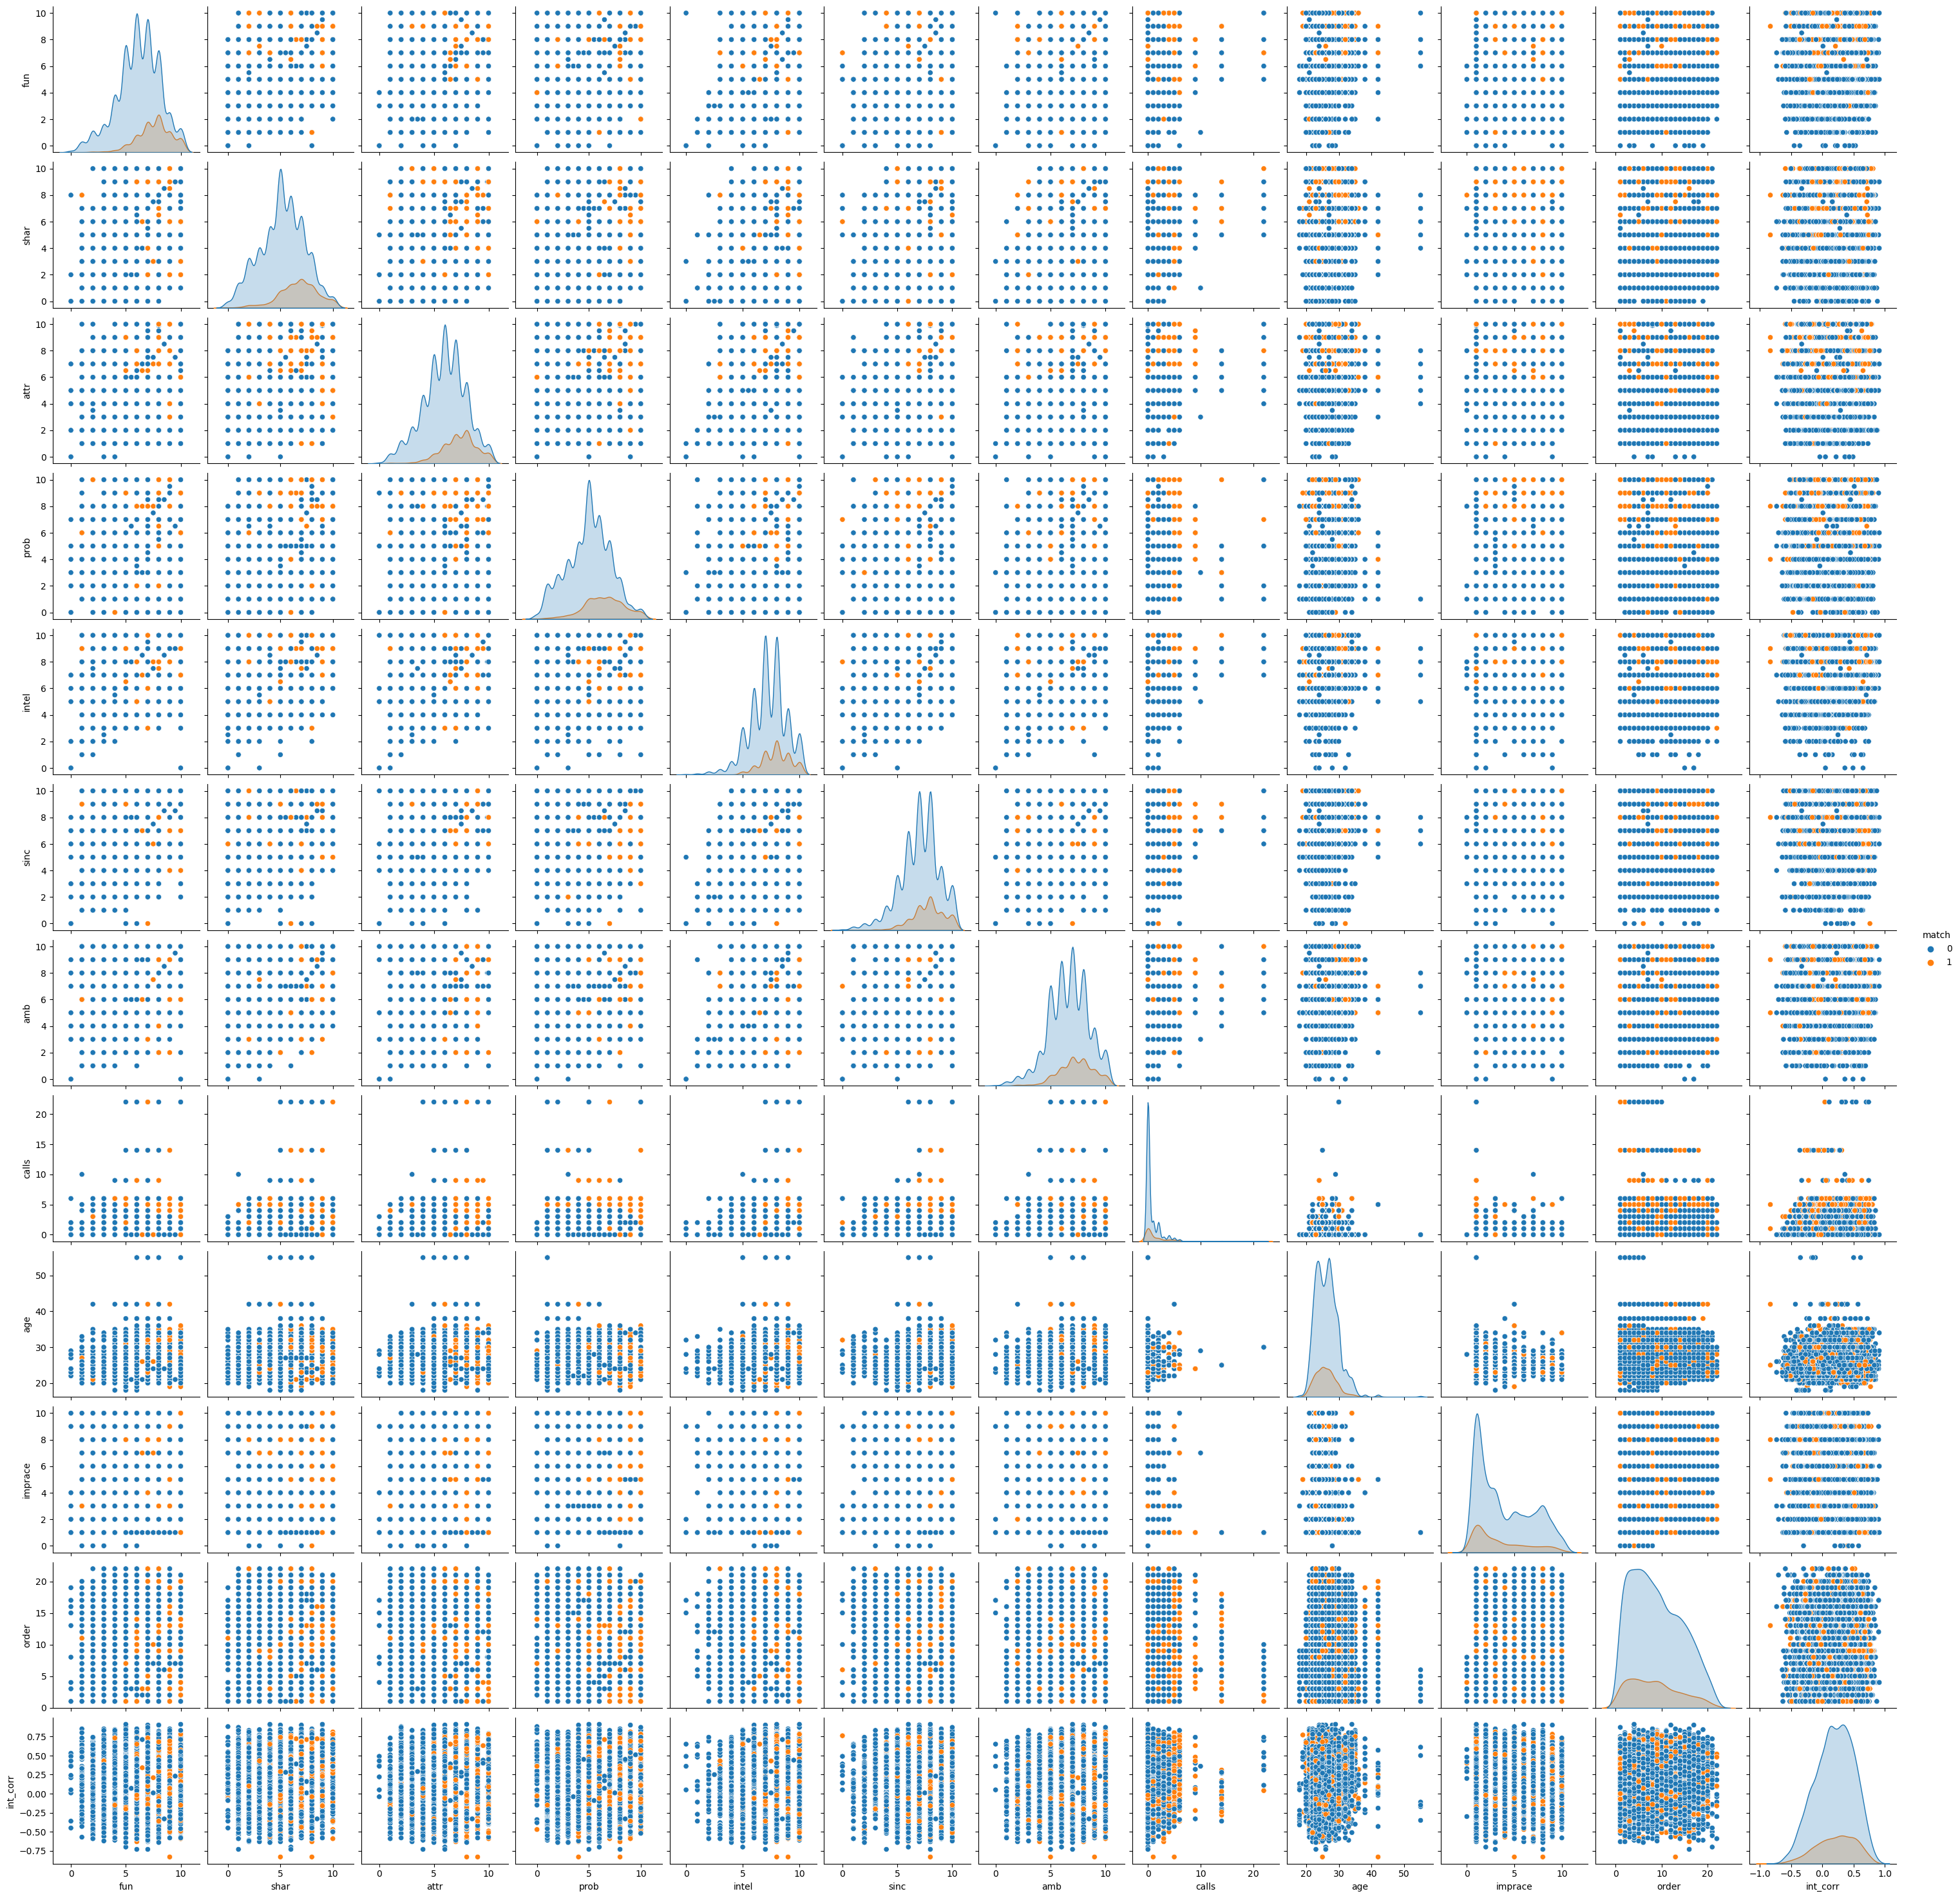

In [19]:
sns.pairplot(df, hue='match')

<AxesSubplot: >

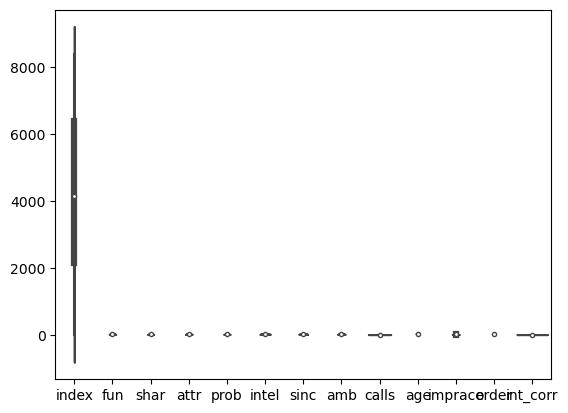

In [126]:
sns.violinplot(df)

### Relationships

In [121]:
# inspect correlation between outcome and possible predictors
df['match']=df['match'].astype("int",copy=False)
corr = df.corr()
df['match']=df['match'].astype("category",copy=False)

corr['match'].sort_values(ascending=False)

C:\Users\lukas\AppData\Local\Temp\ipykernel_25224\2995816152.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


match       1.000000
fun         0.276822
shar        0.270565
attr        0.263631
prob        0.259991
intel       0.173844
sinc        0.167161
amb         0.145196
calls       0.128427
int_corr    0.029220
index      -0.019194
order      -0.029916
age        -0.035454
imprace    -0.055506
Name: match, dtype: float64

In [122]:
# take a look at all correlations
df['match'].sort_values(ascending=False)

5573    1
1801    1
6109    1
6110    1
4759    1
       ..
2518    0
2516    0
2515    0
2514    0
6783    0
Name: match, Length: 6784, dtype: category
Categories (2, int64): [0, 1]

In [123]:
corr.style.background_gradient(cmap='Blues')

## Model

### Select model

In [ ]:
# select the linear regression model
reg = LinearRegression()

### Training and validation

### Fit model

In [ ]:
# Fit the model to the data
reg.fit(X, y)

### Evaluation on test set

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions